In [1]:
# %load ./scripts/do_RT_thermal.py
from pylab import *
import radmc3dPy as rpy
import numpy as np
import os
from scipy import interpolate
import sys
#sys.path.append('../')
from models import *

In [2]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import met_brewer as mb
colors = {}
ccmap = {}
colors['hiro'] = mb.met_brew(name="Hiroshige",brew_type='continuous')
ccmap['hiro'] = LinearSegmentedColormap.from_list('temp', colors['hiro'][::-1], N=100)
register_cmap(cmap=ccmap['hiro'])
colors['dust'] = mb.met_brew(name="Cassatt1",brew_type='continuous')
ccmap['dust'] = LinearSegmentedColormap.from_list('dust', colors['dust'], N=100)
register_cmap(cmap=ccmap['dust'])
colors['gas'] = mb.met_brew(name="Hokusai2",brew_type='continuous')
ccmap['gas'] = LinearSegmentedColormap.from_list('gas', colors['gas'], N=50)
register_cmap(cmap=ccmap['gas'])
colors['vel'] = mb.met_brew(name="Troy",brew_type='continuous')
ccmap['vel'] = LinearSegmentedColormap.from_list('vel', colors['vel'], N=50)
register_cmap(cmap=ccmap['vel'])

In [3]:
gma = {'gm2a': {'snapshot':20},'gm2b':{'Min':5e-7,'snapshot':40},'gm2c':{'Min':1e-7,'snapshot':20}, 'gm2_':{'snapshot':0},
      'gm1a':{'snapshot':10,'Mdisk':0.1,'Mfrac':[0.001,0.006]},'gm1b':{'snapshot':20,'Mdisk':0.1,'Min':5e-7,'Mfrac':[0.001,0.006]},'gm1c':{'snapshot':10,'Mdisk':0.1,'Min':1e-7,'Mfrac':[0.001,0.006]},
       'gm05a':{'snapshot':10,'Mdisk':0.05,'Mfrac':[0.0022,0.013]},'gm05b':{'snapshot':15,'Mdisk':0.05,'Min':5e-7,'Mfrac':[0.0022,0.013]},'gm05c':{'snapshot':50,'Mdisk':0.05,'Min':1e-7,'Mfrac':[0.0022,0.013]},
       'gm02a':{'snapshot':10,'Mdisk':0.02,'Mfrac':[0.005,0.03]},'gm02b':{'snapshot':100,'Mdisk':0.02,'Min':5e-7,'Mfrac':[0.005,0.03]},'gm02c':{'snapshot':20,'Mdisk':0.02,'Min':1e-7,'Mfrac':[0.005,0.03]}}

### Load in model

In [15]:
run = 'gm02a'

simdir = run + '/'
parentsim = '/home/akuznetsova/fargo_infall/outputs/'
pbase = 'gma'
outdir= 'out/gmaur/'
pn = new_model(pbase)
for key,val in gma[run].items():
    if key != 'snapshot':
        pn[key] = val
pn = params_from_fargo(parentsim+simdir,par=pn)
pn['Min'] = 0.
pn['nstreams'] = 1
pn['stream_frac'] = 1
gmm = initialize_model(pn,outdir=outdir)

disk_from_fargo(gmm.m,parentsim+simdir,snapshot=gma[run]['snapshot'],fluid=0)
disk_from_fargo(gmm.m,parentsim+simdir,snapshot=gma[run]['snapshot'],fluid=1)
disk_from_fargo(gmm.m,parentsim+simdir,snapshot=gma[run]['snapshot'],fluid=2,dep_r=34)

directory exists - will overwrite current model if you write to it!
Reading /home/akuznetsova/wedgeford/out/gmaur/wavelength_micron.inp
Assigned model directory:/home/akuznetsova/wedgeford/out/gmaur/
0.02 152.8598884091089
9.999999999999999e-05 0.7642994420455445
0.0006 5.532995821859961


In [14]:
run = 'gm2a'

simdir = 'gm2a/'
parentsim = '/home/akuznetsova/fargo_infall/outputs/'
pbase = 'gma'
outdir= 'out/gmaur/'
pn = new_model(pbase)
for key,val in gma[run].items():
    if key != 'snapshot':
        pn[key] = val
pn = params_from_fargo(parentsim+simdir,par=pn)
pn['Min'] = 0.
pn['nstreams'] = 1
pn['stream_frac'] = 1
gmm = initialize_model(pn,outdir=outdir)

disk_from_fargo(gmm.m,parentsim+simdir,snapshot=gma[run]['snapshot'],fluid=0)
disk_from_fargo(gmm.m,parentsim+simdir,snapshot=gma[run]['snapshot'],fluid=1)
disk_from_fargo(gmm.m,parentsim+simdir,snapshot=gma[run]['snapshot'],fluid=2,dep_r=34)

stellar_params: {'Ms': 1.1, 'Rs': 1.9, 'Ts': 4350, 'accrate': 8e-09, 'f': 0.01}
disk_params: {'Mdisk': 0.2, 'Mfrac': [0.0005, 0.003], 'R0': [1, 1], 'H0': [1, 0.2], 'p': [-1.0, -1.0], 'Rdisk': [175.0, 175.0], 'Tfac': 0.5549937415587494, 'q': 0.5, 'hydro': [0, 0, 0]}
envelope_params: {'Min': 0.0, 'Rc': 90.0, 'rho_amb': 1e-36, 'rho_0': 3e-22, 'theta_min': 41.810314895778596, 'exf': 0.25, 'Rmax': 15000.0, 'd2g': 0.01, 'shock': False, 'nstreams': 1, 'stream_frac': 1}
grid_params: {'N': [300, 180, 90], 'min': [1, 0.7854, 0], 'max': [650, 1.5707963267948966, 6.283185307179586], 'spacing': ['log', 'lin', 'lin']}
dust_params: {'rho_si': 1.675, 'amin_chem': 0.06, 'amax_ism': 1.0, 'amin': [0.005, 0.005], 'amax': [1, 1000.0], 'apow': [3.5, 3.5]}
RT_params: {'cr_model': 'ssx', 'zetacr': 1.3e-17, 'G0': 1, 'viscous_heating': True, 'fLya': 0.0001}
directory exists - will overwrite current model if you write to it!
Reading amr_grid.inp
Reading wavelength_micron.inp
Assigned model directory:/home/akuzne

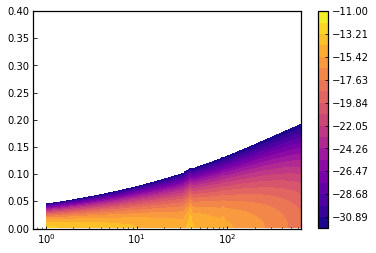

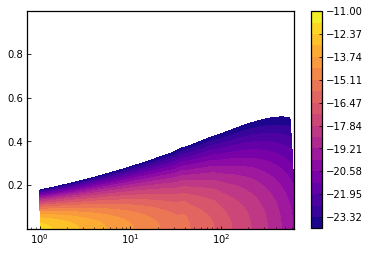

In [61]:
im = plot_slice(gmm, rho=gmm.m.rho_disk(fluid=2),cmap='plasma',levels=np.linspace(-32,-11,20))
colorbar(im)
xscale('log')
ylim(0,0.4)
show()

im = plot_slice(gmm, rho=gmm.m.rho_embedded(fluid=1),cmap='plasma',levels=np.linspace(-24,-11,20))
colorbar(im)
xscale('log')
show()

### Do thermo

writing new file:dust_density.inp
Accretion rate from infall: 0.0 Msun/yr
Reading wavelength_micron.inp
Reading amr_grid.inp
Reading wavelength_micron.inp
thermal monte carlo done!
Reading dust_density.inp
Reading dust_temperature.dat


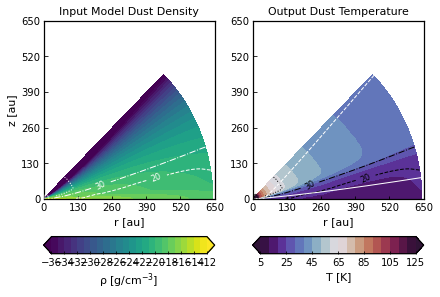

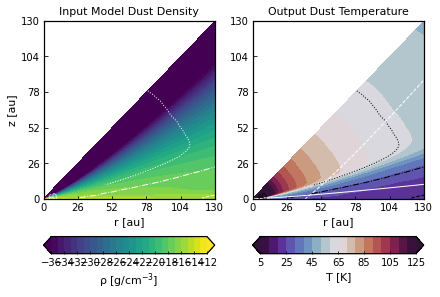

In [17]:
prep_thermal_transfer(gmm,nphot=5000000)
do_thermal_transfer(gmm,nt=64)
print('thermal monte carlo done!')
save_dustRT(gmm)

In [219]:
def A_dep(model,simdir,snapshot):
    disk = fargo_disk(simdir,Mstar=model.star['Ms'])
    t_elapsed = disk.t_yr(snapshot)
    x_disk, y_disk = disk.xy()
    r_disk = np.sqrt(x_disk**2 + y_disk**2)
    vr1 = -disk.get(time=snapshot,prop='vr',dim=None,fluid='dust1')
    vr2 = -disk.get(time=snapshot,prop='vr',dim=None,fluid='dust2')
    vr = ((vr1 + vr2)*0.5).T
    t_drift = ((AU)/vr)/yr
    A_dep = np.clip((t_elapsed/t_drift),a_min=0,a_max=None)
    Afac1 = np.average(A_dep[(r_disk < 0.5*disk.pars['rin'])])
    Afac2 = np.average(A_dep[(r_disk > 1.5*disk.pars['rc'])])
    Afac = (Afac1 + Afac2)/2.
    return Afac

print(A_dep(gmm.m,parentsim+simdir,snapshot=gma[run]['snapshot']))

### Make continuum images

In [6]:
def make_contimage(mu,sizeau=600,npix=300,params={}):
    if params == {}:
        incl = 0
        pa = 0
    else:
        incl = params['incl']
        pa = params['pa']
    command = 'radmc3d image npix {} sizeau {} incl {} lambda {} posang {} noscat'.format(npix,sizeau,incl,mu,pa)
    os.system(command)

def plot_ic_simple(params,fwhm_au=[10,10],cmap='inferno'):
    im = rpy.image.readImage()
    fwhm = np.array(fwhm_au)/params['dpc']
    imc = im.imConv(dpc=params['dpc'],fwhm=fwhm,pa=0.0)
    nf = im.nfreq
    for j in np.arange(0,nf,1):
        im,cb = rpy.image.plotImage(image=imc, arcsec=False, au=True, log=False, dpc=params['dpc'], bunit='norm', ifreq=j, cmap=cmap)
        
def make_contlist():
    npix = 300
    sizeau = 600
    incl = 0
    command = 'radmc3d image npix {} sizeau {} incl {} loadlambda noscat'.format(npix,sizeau,incl)
    os.system(command)

In [7]:
gma_params = {'incl': 53.21, 'pa':57.17, 'dpc':159, 'dpc_err': 4}
#make_contimage(mu=2067,params=gma_params)
#plot_ic_simple(gma_params,fwhm_au=[20,20],cmap='inferno')

In [8]:
make_contlist()

Reading image.out


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


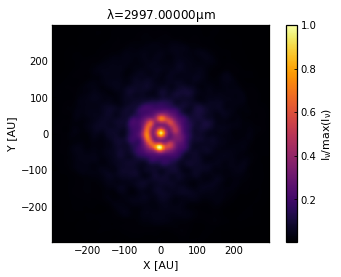

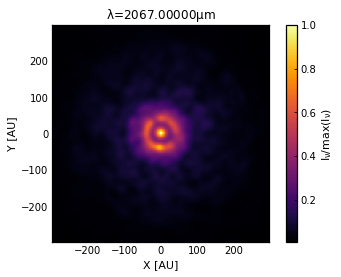

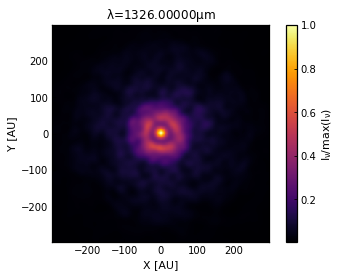

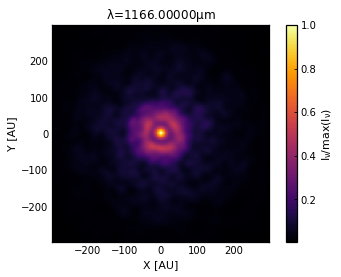

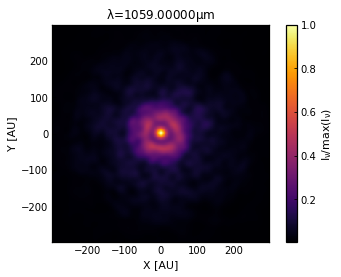

In [9]:
plot_ic_simple(gma_params,fwhm_au=[20,20],cmap='inferno')

### Run HE transfer

In [18]:
write_main(gmm.m,scat=2,mrw=1,maxtau=20)
do_he_transfer(gmm,nphot=1000000,nt=64)

In [33]:
def calc_uvtau(output):
    if output.J == {}:
        output.Jnu(field='uv', average=False)
    elif output.J['uv'][1].ndim != 3:
        output.Jnu(field='uv', average=False)
    nG0 = (integrate_intensity(output,field='uv')/(2.*pi*G0)).swapaxes(0,1)
    R, THETA, PHI = output.m.make_grid()
    nG0_ = nG0[1,:,:]*(R[1,:,:]/R)**2
    mask = np.where((nG0/nG0_) > 0.5, np.ones_like(nG0), np.zeros_like(nG0))
    return mask
    
po_mask = calc_uvtau(gmm)

(300, 180, 90)


In [30]:
calc_gas_T(gmm)

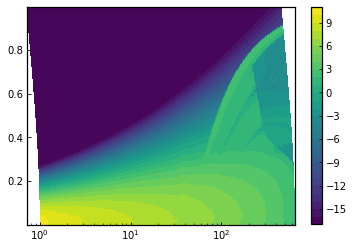

In [66]:
molecules={'names':['co','13co','c18o']}
molecules['xh2'] = np.array([1e-4,1e-4/69,1e-4/557])

nH2 = gmm.m.rho_embedded(fluid=0)/((mu*mh))

nCO = nH2*molecules['xh2'][0]

Tco = Tg
freezeout = np.where(Tco < 20.0)
nCO[freezeout] *= 1e-4
im = plot_slice(gmm,rho=nCO,log=True,levels=30)
xscale('log')
colorbar(im)

#write_molecule_density(gmm.m,molecules['names'],abundances=[nCO,nCO/69,nCO/557])

In [34]:
write_gas_temperature(gmm.m,Tco)
write_velocities(gmm.m)
write_lines(gmm.m,names=molecules['names'])

In [36]:
npix = 300
sizeau = 600
mol = 1
width = 6.0
nlam = 12
incl = gma_params['incl']
pa = gma_params['pa']
command = 'radmc3d image iline 2 widthkms {} linenlam {} incl {} posang {} noscat doppcatch'.format(width,nlam,incl,pa)
os.system(command)

0

Reading image.out


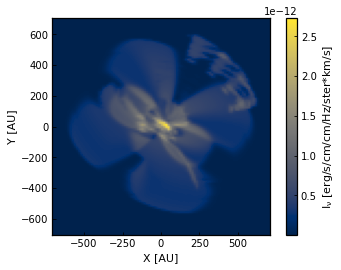

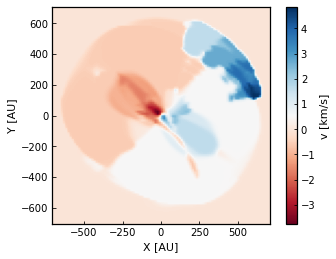

In [39]:
fwhm = np.array([130,94])*1e-3
pa = 9.1
im = rpy.image.readImage()
nu0 = np.median(im.freq)
imc = im.imConv(dpc=gma_params['dpc'],fwhm=fwhm,pa=pa)
#mmap = imc.getMomentMap(moment=0, nu0=nu0)/(gma_params['dpc']**2)
imc.plotMomentMap(moment=0, nu0=nu0, au=True, arcsec=False, cmap='bone')
show()
imc.plotMomentMap(moment=1, nu0=nu0, au=True, arcsec=False, cmap='vel')

In [15]:
def sigma_quick(r,rd):
    return (r)**(-1)*np.exp(-(r/rd))
def m_quick(r,rd,Md,rlim):
    return Md*Msun/(2*pi*np.sum((sigma_quick(r,rd) * (r*AU)*(np.gradient(r)*AU))[r<rlim]))

sd1 = m_quick(gmm.m.r,175,6e-4,300)
sd2 = m_quick(gmm.m.r,175,1e-4,300)
sg = m_quick(gmm.m.r,175,0.045,300)
eps1 = sd1/sg
eps2 = sd2/sg
print(sd1,sd2, sg, eps1, eps2)
print(sg/(1.1*S0conv))

5.965182548803468 0.9941970914672447 447.38869116026007 0.013333333333333334 0.0022222222222222222
4.576013260795869e-05


[2997.92458    2067.81940957 1326.51530088 1166.50761868 1059.33730742]


In [37]:
def beam_area(fwhm):
    return fwhm[0] * fwhm[1] * np.pi / 4. / np.log(2.0)

In [31]:
def snu_units(image,dpc,fwhm,ifreq=0):
    dum_image = image
    data = np.squeeze(image.image[:, ::-1, ifreq].T)
    pixel_area = (image.sizepix_x * image.sizepix_y)/(dpc * pc)**2 * (180./np.pi*3600.)**2
    #beam_area = image.fwhm[0] * image.fwhm[1] * np.pi / 4. / np.log(2.0)
    beam_area = fwhm[0] * fwhm[1] * np.pi / 4. / np.log(2.0)
    data *= (image.sizepix_x * image.sizepix_y / (dpc * pc)**2. * 1e23)
    # Convert data to mJy/beam
    data *= beam_area / pixel_area
    data *= 1e3
    x = image.x / AU #/ dpc
    y = image.y / AU #/ dpc
    return x,y,data

def make_contimage(mu,sizeau=600,npix=300,params={}):
    if params == {}:
        incl = 0
        pa = 0
    else:
        incl = params['incl']
        pa = params['pa']
    command = 'radmc3d image npix {} sizeau {} incl {} lambda {} posang {} secondorder noscat'.format(npix,sizeau,incl,mu,pa)
    os.system(command)
    

def radial_I(fwhm=fwhm,noise=noise,imax=5):
    im = rpy.image.readImage()
    imc = im.imConv(dpc=GMaur_params['dpc'],fwhm=fwhm,pa=pa)
    xau, yau, im_mjy = snu_units(imc,dpc=GMaur_params['dpc'],fwhm=fwhm)
    X,Y = np.meshgrid(xau,yau)
    rau = np.sqrt(X**2 + Y**2)
    rbins = np.arange(1,np.amax(rau),2)
    Ibins = np.linspace(noise/2.,imax,50)
    H,xe,ye = np.histogram2d(rau.flatten(),im_mjy.flatten(),bins=(rbins,Ibins),density=True)
    rr = (rbins[1:] + rbins[:-1])*0.5
    ii = (Ibins[1:] + Ibins[:-1])*0.5
    RR,II = np.meshgrid(rr,ii)
    Ip = np.sum(II*H.T,axis=0)/np.sum(H.T,axis=0)
    return (rr,Ip)